In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set(style="whitegrid")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Datasets\Datasets.csv')

In [4]:
df.shape

(833, 15)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(5)

,Brand,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
0,Apple iPad mini (2024),195.4,134.8,6.3,293,1,5078,203.9,1488,2266,6,128,8,0,600.00
1,Apple iPhone 16 Pro Max,163.0,77.6,8.3,227,1,4685,115.6,1320,2868,6,256,8,1,1199.99
2,Apple iPhone 16 Pro,149.6,71.5,8.3,199,1,3582,96.4,1206,2622,6,128,8,1,999.99
3,Apple iPhone 16 Plus,160.9,77.8,7.8,199,1,4674,110.2,1290,2796,6,128,8,1,899.00
4,Apple iPhone 16,147.6,71.6,7.8,170,1,3561,91.7,1179,2556,6,128,8,1,829.99


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       833 non-null    object 
 1   Dimension Leight (mm)       833 non-null    float64
 2   Dimension Width (mm)        833 non-null    float64
 3   Dimesion Thickness (mm)     833 non-null    float64
 4   Weight (g)                  833 non-null    int64  
 5   Battery Type                833 non-null    int64  
 6   Battery Capacity (mAh)      833 non-null    int64  
 7   Screen Size (cm2)           833 non-null    float64
 8   Resolution Height (pixels)  833 non-null    int64  
 9   Resolution Width (pixels)   833 non-null    int64  
 10  CPU (cores)                 833 non-null    int64  
 11  Internal Storage (GB)       833 non-null    int64  
 12  RAM (GB)                    833 non-null    int64  
 13  NFC Support                 833 non

In [8]:
df.describe()

,Dimension Leight (mm),Dimension Width (mm),Dimesion Thickness (mm),Weight (g),Battery Type,Battery Capacity (mAh),Screen Size (cm2),Resolution Height (pixels),Resolution Width (pixels),CPU (cores),Internal Storage (GB),RAM (GB),NFC Support,Price (USD)
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.0,833.000000,833.000000,833.000000,833.000000
mean,173.465546,88.877311,8.182833,231.638655,0.560624,5010.507803,138.461945,1094.318127,2152.912365,6.0,130.278511,9.231693,0.529412,342.946780
std,35.711338,35.451596,1.372570,118.798008,0.496609,1721.972312,102.349226,387.451037,545.108020,0.0,96.569409,39.240081,0.499434,302.717284
min,104.900000,52.800000,5.100000,113.000000,0.000000,307.000000,24.300000,240.000000,320.000000,6.0,1.000000,1.000000,0.000000,40.000000
25%,160.100000,74.600000,7.700000,180.000000,0.000000,4383.000000,102.000000,720.000000,1604.000000,6.0,64.000000,4.000000,0.000000,150.000000
50%,163.100000,76.000000,8.000000,190.000000,1.000000,5000.000000,107.400000,1080.000000,2400.000000,6.0,128.000000,6.000000,1.000000,240.000000
75%,167.300000,77.600000,8.600000,209.000000,1.000000,5100.000000,109.800000,1206.000000,2436.000000,6.0,128.000000,8.000000,1.000000,430.000000
max,326.400000,220.600000,20.100000,750.000000,1.000000,11200.000000,617.800000,2880.000000,3200.000000,6.0,512.000000,512.000000,1.000000,2099.000000


In [9]:
df.isnull().sum()/100

Brand                         0.0
Dimension Leight (mm)         0.0
Dimension Width (mm)          0.0
Dimesion Thickness (mm)       0.0
Weight (g)                    0.0
Battery Type                  0.0
Battery Capacity (mAh)        0.0
Screen Size (cm2)             0.0
Resolution Height (pixels)    0.0
Resolution Width (pixels)     0.0
CPU (cores)                   0.0
Internal Storage (GB)         0.0
RAM (GB)                      0.0
NFC Support                   0.0
Price (USD)                   0.0
dtype: float64

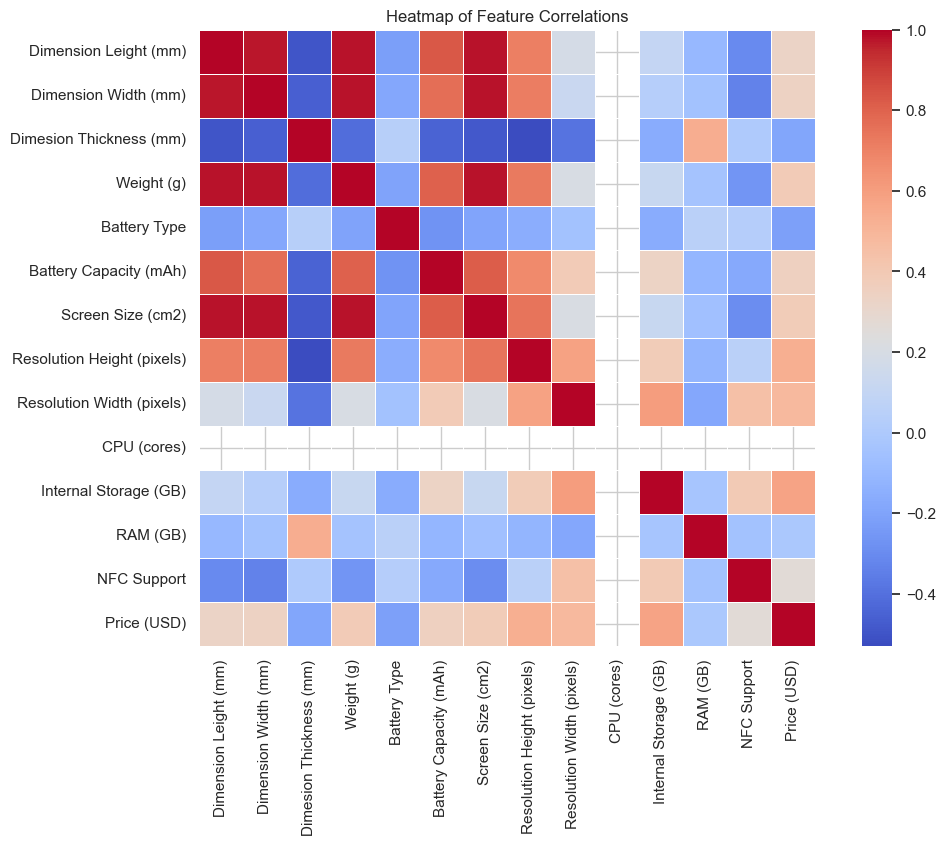

In [10]:
correlation_matrix = df.drop(columns=['Brand']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25608\3978831306.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index.astype(str), y=price_range_counts.values, palette="pastel")


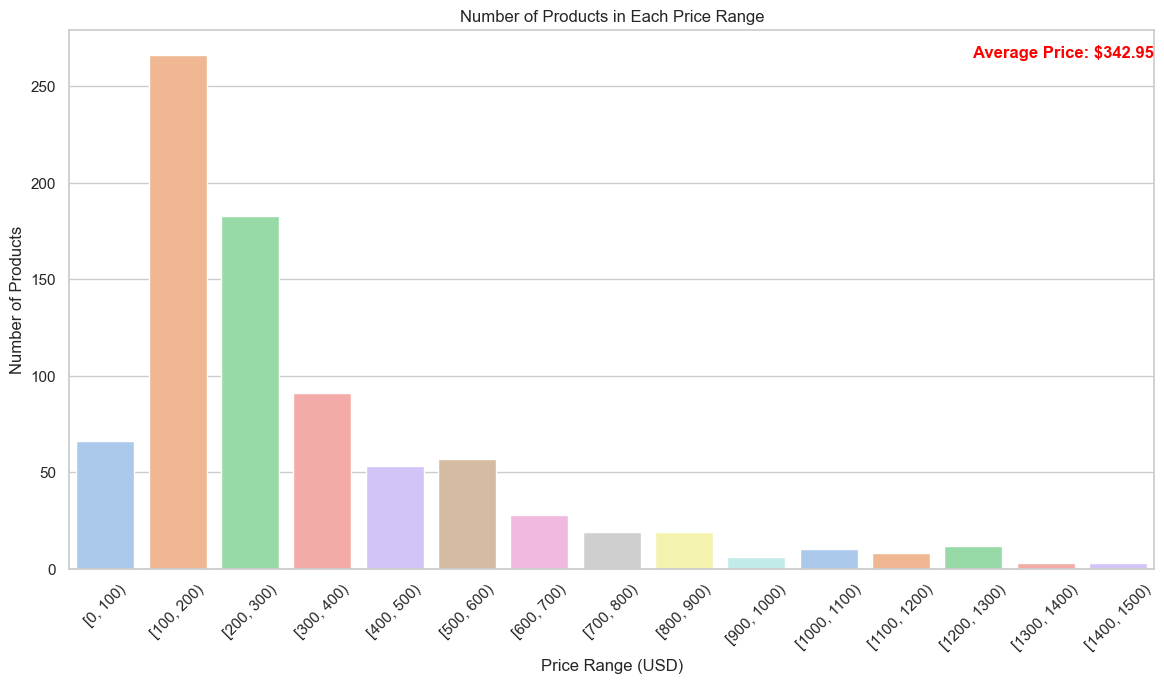

In [22]:
# Create price range bins with equal intervals and count the number of products in each bin
max_price = int(df["Price (USD)"].max())  # Cast to integer
price_bins = range(0, 1600, 100)
df["Price Range"] = pd.cut(df["Price (USD)"], bins=price_bins, right=False)

# Count the number of products in each price range
price_range_counts = df["Price Range"].value_counts().sort_index()

# Calculate the average price of all products
average_price = df["Price (USD)"].mean()

# Plot a bar chart for the number of products in each price range
plt.figure(figsize=(14, 7))
sns.barplot(x=price_range_counts.index.astype(str), y=price_range_counts.values, palette="pastel")

# Display the average price as text on the plot
plt.text(
    x=len(price_range_counts) - 3,  # Position near the end of the x-axis
    y=max(price_range_counts) - 1,  # Position near the top of the y-axis
    s=f"Average Price: ${average_price:.2f}", 
    color="red", fontsize=12, fontweight="bold")

plt.title("Number of Products in Each Price Range")
plt.xlabel("Price Range (USD)")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


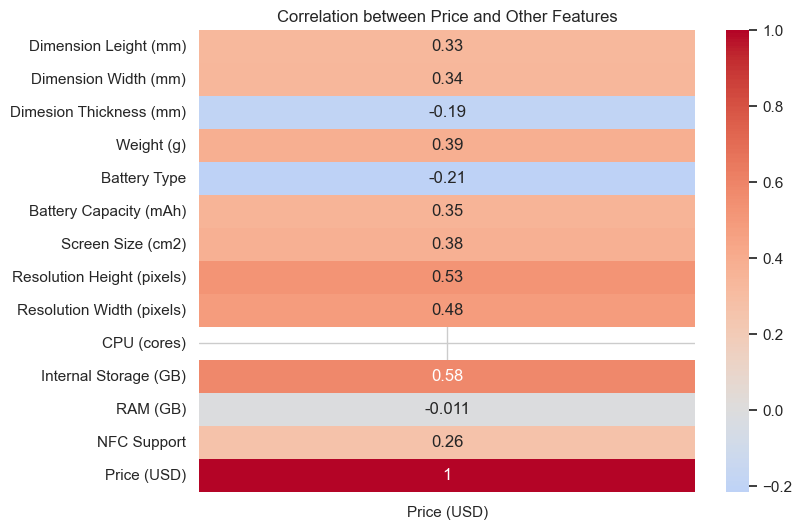

In [12]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_features.corr()

price_corr = correlation_matrix[['Price (USD)']]
plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True,cmap='coolwarm', center=0)
plt.title('Correlation between Price and Other Features')
plt.show()

In [13]:
blue_palette = [
    '#1f77b4',
    '#87CEEB',
    '#2ca02c',
    '#4F94CD',
    '#00BFFF',
    '#32CD32',
    '#66CDAA',
    '#4682B4'
]

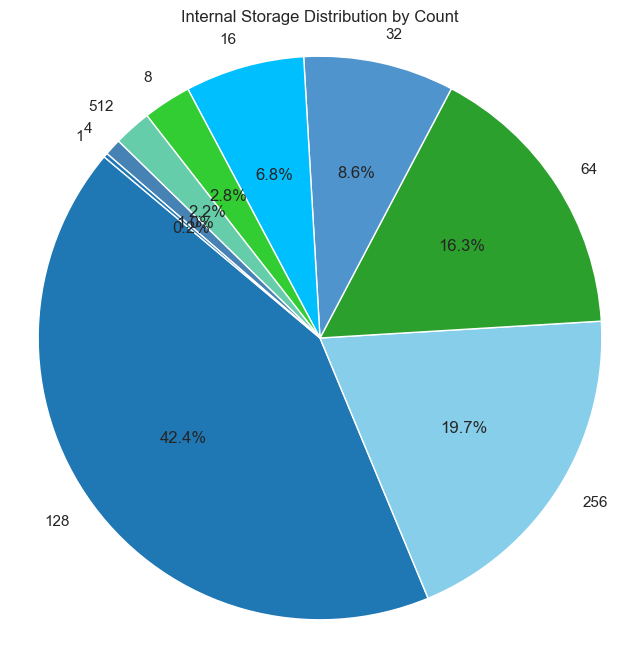

In [14]:
sale_counts = df['Internal Storage (GB)'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sale_counts, labels=sale_counts.index, autopct='%1.1f%%', startangle=140,colors=blue_palette)
plt.title('Internal Storage Distribution by Count')
plt.axis('equal')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25608\433417198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Internal Storage (GB)', y='Price (USD)', data=df, palette='Blues')


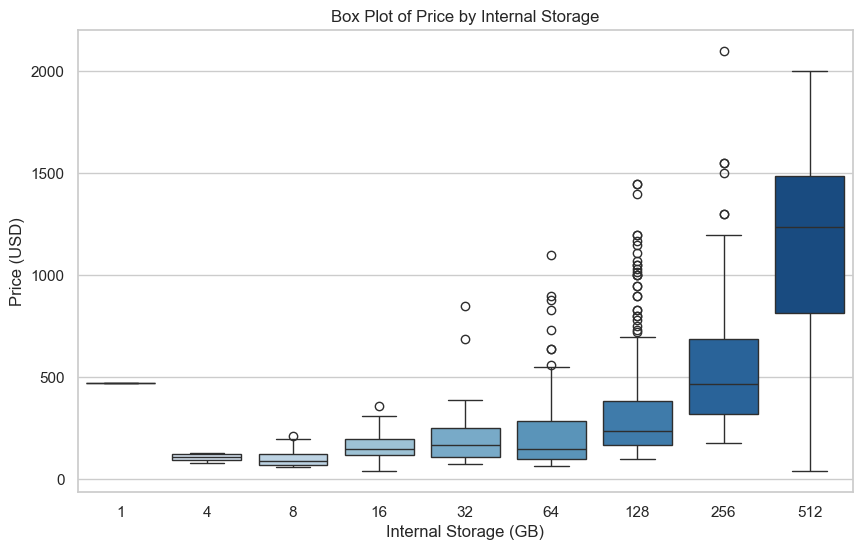

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internal Storage (GB)', y='Price (USD)', data=df, palette='Blues')
plt.title('Box Plot of Price by Internal Storage')
plt.xlabel('Internal Storage (GB)')
plt.ylabel('Price (USD)')
plt.show()

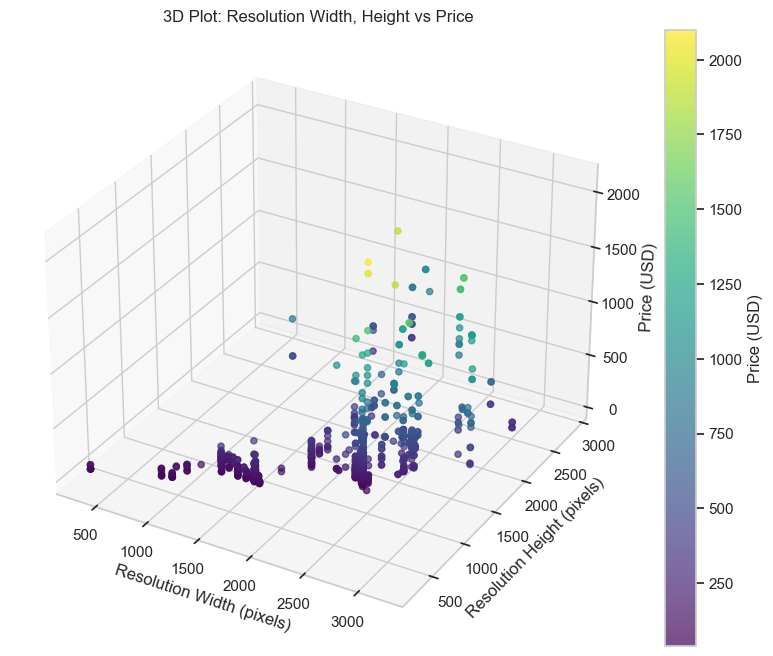

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(
    df["Resolution Width (pixels)"], 
    df["Resolution Height (pixels)"], 
    df["Price (USD)"], 
    c=df["Price (USD)"], cmap="viridis", alpha=0.7
)

ax.set_title("3D Plot: Resolution Width, Height vs Price")
ax.set_xlabel("Resolution Width (pixels)")
ax.set_ylabel("Resolution Height (pixels)")
ax.set_zlabel("Price (USD)")

# Add a color bar to indicate price
plt.colorbar(sc, label="Price (USD)")

plt.show()

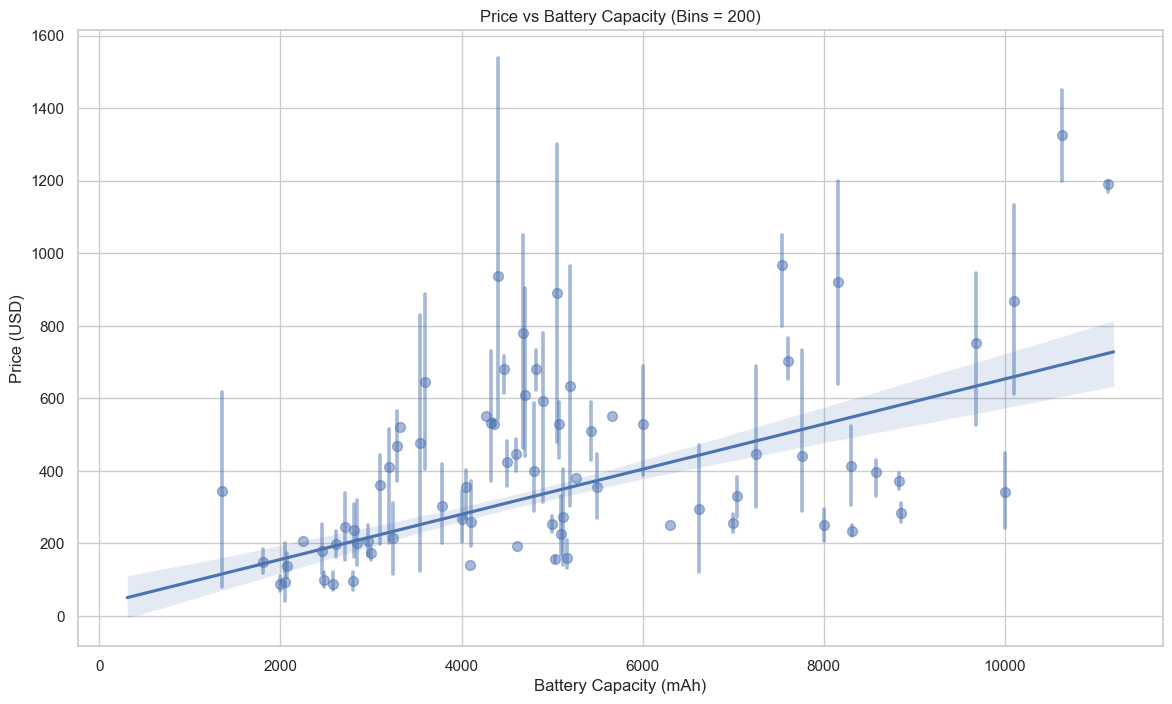

In [ ]:
plt.figure(figsize=(14, 8))
sns.regplot(
    x="Battery Capacity (mAh)", 
    y="Price (USD)", 
    data=df, 
    scatter_kws={'alpha': 0.5}, 
    x_bins=200  # Chia trục x thành các bins 200
)
plt.title("Price vs Battery Capacity")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Price (USD)")
plt.show()

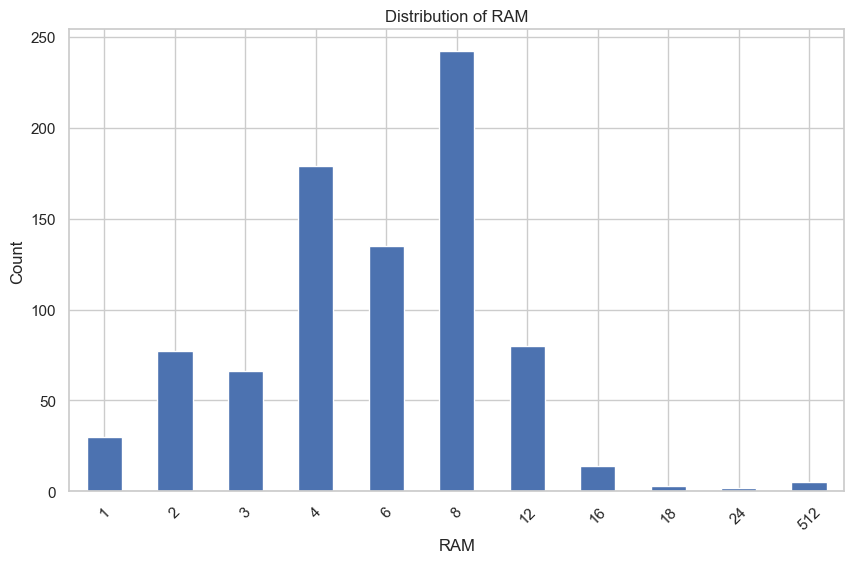

In [ ]:
resolution_counts = df['RAM (GB)'].value_counts().sort_values(ascending=True).sort_index()

plt.figure(figsize=(10, 6))
resolution_counts.plot(kind='bar')
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()